In [ ]:
!pip install pytesseract # Install tesseract for text extraction
!sudo apt install tesseract-ocr # Install tesseract OCR engine

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,816 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os

# Define the base path for your data
base_path = '.'  # Start with the current directory

# Construct the full path to the images directory
images_path = os.path.join(base_path, 'sample_data', 'images')

# Now you can use 'images_path' to access the directory
print(images_path)

# For example, to list the files in the directory:
import os
for filename in os.listdir(images_path):
    print(filename)

./sample_data/images
231.400.jpg
355.400.jpg
358.400.jpg
213.400.jpg
34.400.jpg
161.400.jpg
904.400.jpg
517.400.jpg
210.400.jpg
105.400.jpg
286.400.jpg
271.400.jpg
621.400.jpg
103.400.jpg
348.400.jpg
374.400.jpg
181.400.jpg
313.400.jpg
142.400.jpg
520.400.jpg
599.400.jpg
339.400.jpg
167.400.jpg
137.400.jpg
328.400.jpg
1463.400.jpg
13.400.jpg
356.400.jpg
74.400.jpg
408.400.jpg
64.400.jpg
372.400.jpg
307.400.jpg
477.400.jpg
990.400.jpg
306.400.jpg
182.400.jpg
72.400.jpg
23.400.jpg
91.400.jpg
899.400.jpg
398.400.jpg
84.400.jpg
176.400.jpg
155.400.jpg
901.400.jpg
353.400.jpg
190.400.jpg
228.400.jpg
3520.400.jpg
382.400.jpg
1044.400.jpg
198.400.jpg
57.400.jpg
302.400.jpg
253.400.jpg
622.400.jpg
83.400.jpg
267.400.jpg
247.400.jpg
44.400.jpg
129.400.jpg
376.400.jpg
342.400.jpg
30.400.jpg
243.400.jpg
215.400.jpg
38.400.jpg
69.400.jpg
3655.400.jpg
163.400.jpg
248.400.jpg
980.400.jpg
338.400.jpg
56.400.jpg
618.400.jpg
115.400.jpg
75.400.jpg
2750.400.jpg
109.400.jpg
250.400.jpg
988.400.jpg
199.40

In [10]:
# Install dependencies
!pip install -q transformers torchvision pillow matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
userdata.get('secretName')

In [12]:

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load BLIP
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Set image folder path (Update this to your image folder)
image_folder = "/content/sample_data/images"  # Update this path to your mounted folder in Colab or local

# Load image files
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".jpg")]

captions = []

for img_path in image_files:
    try:
        image = Image.open(img_path).convert("RGB")
        inputs = processor(image, return_tensors="pt")
        out = model.generate(**inputs)
        caption = processor.decode(out[0], skip_special_tokens=True)
        captions.append({'filename': os.path.basename(img_path), 'caption': caption})
    except Exception as e:
        print(f"Error with {img_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(captions)
print(df)

# Simple entity extraction (noun-based from captions)
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')




        filename                                            caption
0    231.400.jpg                  a hand holding a bottle of coffee
1    355.400.jpg              the logo for the new line of products
2    358.400.jpg           a black and white photo of a white recal
3    213.400.jpg                   a jar of food with a label on it
4     34.400.jpg               a bottle of apple juice with a label
..           ...                                                ...
497  226.400.jpg              a bottle of coffee next to a canister
498   39.400.jpg       a bottle of milk sitting on top of a counter
499   15.400.jpg  a pizza with a glass of wine and a plate of pizza
500   20.400.jpg                        a strainer filled with peas
501  280.400.jpg           a jar of food that is sitting on a table

[502 rows x 2 columns]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


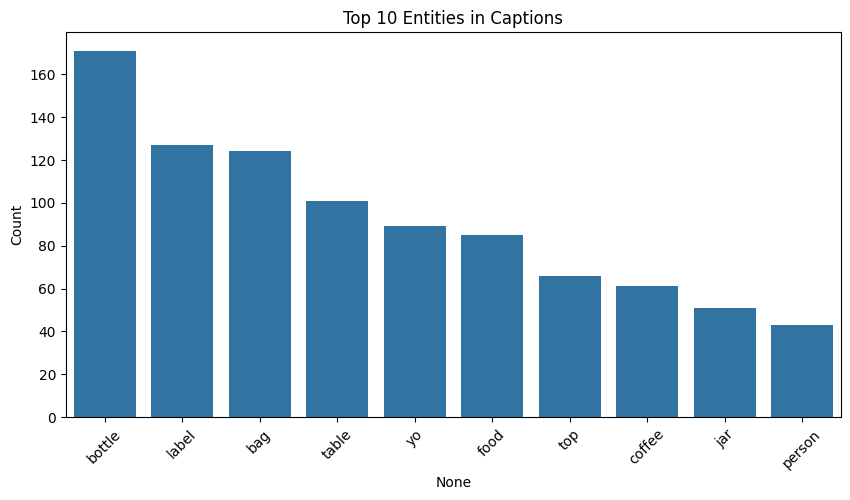

,filename,caption,entities
0,231.400.jpg,a hand holding a bottle of coffee,"[hand, bottle, coffee]"
1,355.400.jpg,the logo for the new line of products,"[logo, line, products]"
2,358.400.jpg,a black and white photo of a white recal,"[photo, recal]"
3,213.400.jpg,a jar of food with a label on it,"[jar, food, label]"
4,34.400.jpg,a bottle of apple juice with a label,"[bottle, apple, juice, label]"
...,...,...,...
497,226.400.jpg,a bottle of coffee next to a canister,"[bottle, coffee, canister]"
498,39.400.jpg,a bottle of milk sitting on top of a counter,"[bottle, milk, top, counter]"
499,15.400.jpg,a pizza with a glass of wine and a plate of pizza,"[pizza, glass, wine, plate, pizza]"
500,20.400.jpg,a strainer filled with peas,"[strainer, peas]"


In [17]:
import nltk

# Download the necessary resource for the PerceptronTagger
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt') # This is also needed for word_tokenize
nltk.download('averaged_perceptron_tagger_eng') # Download the english tagger if using english text


def extract_nouns(text):
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    return [word for word, tag in tags if tag.startswith("NN")]

df['entities'] = df['caption'].apply(extract_nouns)

# Flatten all entities
all_entities = [entity for sublist in df['entities'] for entity in sublist]

# EDA: Frequency plot
entity_counts = pd.Series(all_entities).value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=entity_counts.index[:10], y=entity_counts.values[:10])
plt.title("Top 10 Entities in Captions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Show entity-tagged captions
df[['filename', 'caption', 'entities']]

In [21]:
# do some EDA witht he dataframe
df.head()


,filename,caption,entities
0,231.400.jpg,a hand holding a bottle of coffee,"[hand, bottle, coffee]"
1,355.400.jpg,the logo for the new line of products,"[logo, line, products]"
2,358.400.jpg,a black and white photo of a white recal,"[photo, recal]"
3,213.400.jpg,a jar of food with a label on it,"[jar, food, label]"
4,34.400.jpg,a bottle of apple juice with a label,"[bottle, apple, juice, label]"


In [18]:
import json

# Save results to JSON
output_data = df[['filename', 'caption', 'entities']].to_dict(orient='records')

json_output_path = "/content/image_captions_entities.json"
with open(json_output_path, "w") as f:
    json.dump(output_data, f, indent=4)

# Show download link
from google.colab import files
files.download(json_output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>